Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness,modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU."

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [4]:
train_images.shape

(60000, 28, 28)

pixel values are between 0 and 255, 0 being black and 255 being white.

In [6]:
train_images[0]  # let's have a look at one pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
np.unique(train_labels) # let's have a look at the first 10 training labels`

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
#Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

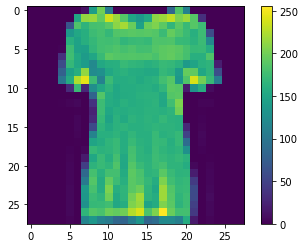

In [20]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.show()

## Data Preprocessing
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [23]:
#The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5049 - accuracy: 0.8213
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3789 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3368 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3116 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2946 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2797 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2582 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2492 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 23s 12ms/st

In [25]:
##Evaluating the Model

#"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.3437 - accuracy: 0.8788
Test accuracy: 0.8787999749183655


# Making Predictions

In [26]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


Trouser


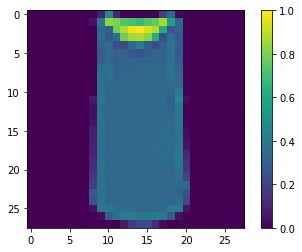

In [43]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.show()

# Verifying Predictions

Pick a number: 66
1/1 [==============================] - 0s 64ms/step


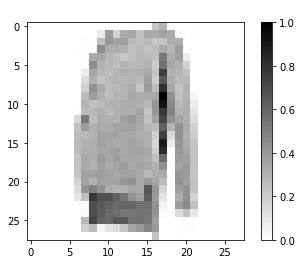

In [44]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
